In [44]:
# basic import(s)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# model imports
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### 1. Reading the Dataset

In [4]:
df = pd.read_csv('./src/encoded_player_modeling_data.csv').drop('Unnamed: 0', axis = 1)

df.head()

,gsis_id,full_name,team_x,height,weight,age_at_injury,years_exp,Out_Count,Out_Count_2020,Out_Count_2021,...,report_primary_injury_x_right Calf,report_primary_injury_x_right Elbow,report_primary_injury_x_right Finger,report_primary_injury_x_right Groin,report_primary_injury_x_right Hamstring,report_primary_injury_x_right Hip,report_primary_injury_x_right Knee,report_primary_injury_x_right Shoulder,report_primary_injury_x_right Thumb,"report_primary_injury_x_toe, pec, knee, hip"
0,00-0019596,tom brady,TB,76.0,225.0,46.0,22.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,00-0022531,jason peters,DAL,76.0,328.0,41.0,18.0,133.0,57.0,76.0,...,0,0,0,0,0,0,0,0,0,0
2,00-0023252,robbie gould,SF,72.0,190.0,40.0,17.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,00-0023459,aaron rodgers,GB,74.0,225.0,40.0,17.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,00-0023853,matt prater,ARI,70.0,201.0,38.0,16.0,34.0,34.0,0.0,...,0,0,0,0,0,1,0,0,0,0


In [5]:
# let's check columns first
list(df.columns)

['gsis_id',
 'full_name',
 'team_x',
 'height',
 'weight',
 'age_at_injury',
 'years_exp',
 'Out_Count',
 'Out_Count_2020',
 'Out_Count_2021',
 'Out_Count_2022',
 'Injured_in_2022',
 'position_x_x_C',
 'position_x_x_CB',
 'position_x_x_DE',
 'position_x_x_DT',
 'position_x_x_FB',
 'position_x_x_G',
 'position_x_x_K',
 'position_x_x_LB',
 'position_x_x_LS',
 'position_x_x_P',
 'position_x_x_QB',
 'position_x_x_RB',
 'position_x_x_S',
 'position_x_x_T',
 'position_x_x_TE',
 'position_x_x_WR',
 'injury_category_Lower Body',
 'injury_category_Other',
 'injury_category_Upper Body',
 'report_primary_injury_x_Abdomen',
 'report_primary_injury_x_Achilles',
 'report_primary_injury_x_Ankle',
 'report_primary_injury_x_Appendix',
 'report_primary_injury_x_Back',
 'report_primary_injury_x_Biceps',
 'report_primary_injury_x_Calf',
 'report_primary_injury_x_Chest',
 'report_primary_injury_x_Collarbone',
 'report_primary_injury_x_Concussion',
 'report_primary_injury_x_Elbow',
 'report_primary_injury_x

In [24]:
df.info()

# looks like there are a few missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1389 entries, 0 to 1388
Data columns (total 84 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   gsis_id                                                       1389 non-null   object 
 1   full_name                                                     1389 non-null   object 
 2   team_x                                                        1389 non-null   object 
 3   height                                                        1388 non-null   float64
 4   weight                                                        1388 non-null   float64
 5   age_at_injury                                                 1388 non-null   float64
 6   years_exp                                                     1388 non-null   float64
 7   Out_Count                                                     1389 no

In [25]:
df.shape

(1389, 84)

In [26]:
# dropping the 10 rows w/ missing values
df.dropna(inplace = True)

df.shape

(1388, 84)

### 2. Building a Predictive Model

In [27]:
# creating features, X
X = df.drop(['gsis_id', 'full_name', 'team_x', 'Out_Count', 'Out_Count_2022', 'Injured_in_2022'], axis = 1)

# creating 'y', our target
y = df['Injured_in_2022']

In [28]:
# do we need to stratify when we train/test split
y.value_counts(normalize = True) # yes we do!

0.0    0.837896
1.0    0.162104
Name: Injured_in_2022, dtype: float64

In [29]:
# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)

In [30]:
# we should also scale our data since most of the vars are in different magnitudes
# instantiating our standard scaler
sc = StandardScaler()

# fit AND transform X_train
X_train_sc = sc.fit_transform(X_train)

# just transform X_test
X_test_sc = sc.transform(X_test)

In [31]:
# now, let's build the model

# instantiate Logistic Reg
logr = LogisticRegression()

# fit the model on training data
logr.fit(X_train_sc, y_train)

LogisticRegression()

In [37]:
# injured? prediction for 2022
preds_2022 = logr.predict(X_test_sc)

### 3. Model Evaluation

In [45]:
# creating a confusion matrix
cm = confusion_matrix(y_test, preds_2022)

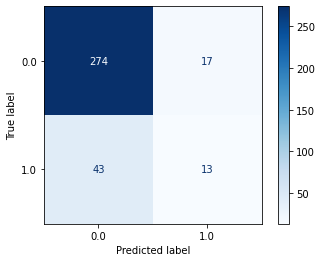

In [46]:
# plotting the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = logr.classes_)
disp.plot(cmap='Blues', values_format='d')

plt.show()

This evaluation tells us a fair bit about where our model's weaknesses lie. The model was pretty strong at predicting the absence of injury, however, there were 43 total **false negatives** (instances where we predicted there to be no injury, but there was an injury). Additionally, the model's overall predictive power is weaker at actually predicting the occurrence of an injury. This is definitely something we can improve upon in the future by looking deeper into the features in our model and fine tuning hyperparameters.

### 4. Adding a Predicted Probability of Injury Column to our Data Frame

In [69]:
# scaling the whole X matrix
X_sc = sc.transform(X)

# using X_sc to make predictive probabilities of injury column for the main data frame
df['chance_injury'] = [round(i[1], 6)*100 for i in logr.predict_proba(X_sc)] 

In [73]:
df.head()

,gsis_id,full_name,team_x,height,weight,age_at_injury,years_exp,Out_Count,Out_Count_2020,Out_Count_2021,...,report_primary_injury_x_right Elbow,report_primary_injury_x_right Finger,report_primary_injury_x_right Groin,report_primary_injury_x_right Hamstring,report_primary_injury_x_right Hip,report_primary_injury_x_right Knee,report_primary_injury_x_right Shoulder,report_primary_injury_x_right Thumb,"report_primary_injury_x_toe, pec, knee, hip",chance_injury
0,00-0019596,tom brady,TB,76.0,225.0,46.0,22.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.0470
1,00-0022531,jason peters,DAL,76.0,328.0,41.0,18.0,133.0,57.0,76.0,...,0,0,0,0,0,0,0,0,0,0.0131
2,00-0023252,robbie gould,SF,72.0,190.0,40.0,17.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.2002
3,00-0023459,aaron rodgers,GB,74.0,225.0,40.0,17.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.1382
4,00-0023853,matt prater,ARI,70.0,201.0,38.0,16.0,34.0,34.0,0.0,...,0,0,0,0,1,0,0,0,0,0.0488
